In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import time
import numpy as np
import pickle

# torch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR
from tqdm import tqdm
from sklearn.decomposition import PCA

import sys
sys.path.append('/home/icb/manuel.gander/Atl/notebooks/')
import utils
import importlib
utils = importlib.reload(utils)

In [3]:
datasets = ['RNA', 'atlantic', 'atl_only_full', 'atl_only_phos', 'identity']

In [4]:
frames = []

for dataset in datasets:
    for n_components in tqdm([2,5,10,30,100,1000000]):
        D_prot, features, celllines = utils.load_dataset(dataset)
        if n_components < len(list(D_prot.values())[0]):
            # Do a PCA of D_prot
            keys = D_prot.keys()
            arrays = np.array(list(D_prot.values()))
            stacked_arrays = np.vstack(arrays)
              # Number of components for PCA
            pca = PCA(n_components=n_components)
            pca.fit(stacked_arrays)
            explained_variance_ratio = pca.explained_variance_ratio_
            frames.append(pd.DataFrame({'expl_var':explained_variance_ratio.sum(), 'dataset':[dataset], 
                                        'n_comp':n_components}))
            transformed_arrays = pca.transform(stacked_arrays)            
            for i,k in enumerate(keys):
                D_prot[k] = transformed_arrays[i,:]
            D_prot2 = {}
            for k in D_prot.keys():
                D_prot2[k] = D_prot[k]
            cellos = sorted(set([a.split('_')[0] for a in D_prot2.keys()]))
            with open(f'/home/icb/manuel.gander/Atl/data/pcas/{dataset}_{n_components}.pkl', 'wb') as file:
                pickle.dump([D_prot2, range(len(list(D_prot2.values())[0])), cellos], file)
        else:
            with open(f'/home/icb/manuel.gander/Atl/data/pcas/{dataset}_{n_components}.pkl', 'wb') as file:
                pickle.dump([D_prot, features, celllines], file)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.83it/s]


In [5]:
# make a heatmap of expl. variances

In [6]:
dataset

'identity'

In [7]:
len(set([a.split('_')[0] for a in D_prot.keys()]))

787

In [8]:
Path='/home/icb/manuel.gander/Atl/data'
M0=pd.read_pickle(f'{Path}/Ccl_identity.pkl')

In [9]:
M0

,1321N1,23132/87,42MGBA,59M,697,769P,786O,8MGBA,A101D,A1207,...,WM88,WM983B,WSUDLCL2,WT2IPS,YAPC,YH13,YKG1,YMB1,ZR751,ZR7530
BREAST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
CENTRAL,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
HAEMATOPOIETIC,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KIDNEY,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LARGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LUNG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OVARY,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PANCREAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
SKIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
STOMACH,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
Dfe = pd.concat(frames)
Dfe = Dfe.pivot(columns='dataset', index='n_comp', values='expl_var')
Dfe = Dfe.fillna(1)
Dfe

dataset,RNA,atl_only_full,atl_only_phos,atlantic,identity
n_comp,,,,,
2,0.212605,0.528564,0.288460,0.337850,0.456907
5,0.310313,0.603905,0.380031,0.423611,0.736984
10,0.388263,0.662099,0.465090,0.505910,1.000000
30,0.522682,0.778463,0.632568,0.664244,1.000000
100,0.673761,0.963785,0.932820,0.938661,1.000000


In [11]:
D_fn = {'Gygi':'Gygi-CCLE', 'RNA':'Transcriptomics', 'atl_full_and_kinases':'Atl. Full+Kinase scores',
        'atl_only_full':'Atl. Full Proteome', 'atl_only_phos':'Atl. Phosphoproteome',
        'atlantic': 'Atl. Full+Phosphoproteome', 'drug_scores':'Atl. Drug Scores',
        'identity':'Tissue of Origin', 'kinase_scores':'Atl. Kinase Scores'}

In [12]:
Dfe.columns = Dfe.columns.map(D_fn)

Text(0.5, 70.56666666666665, 'Number of Components used for PCA')

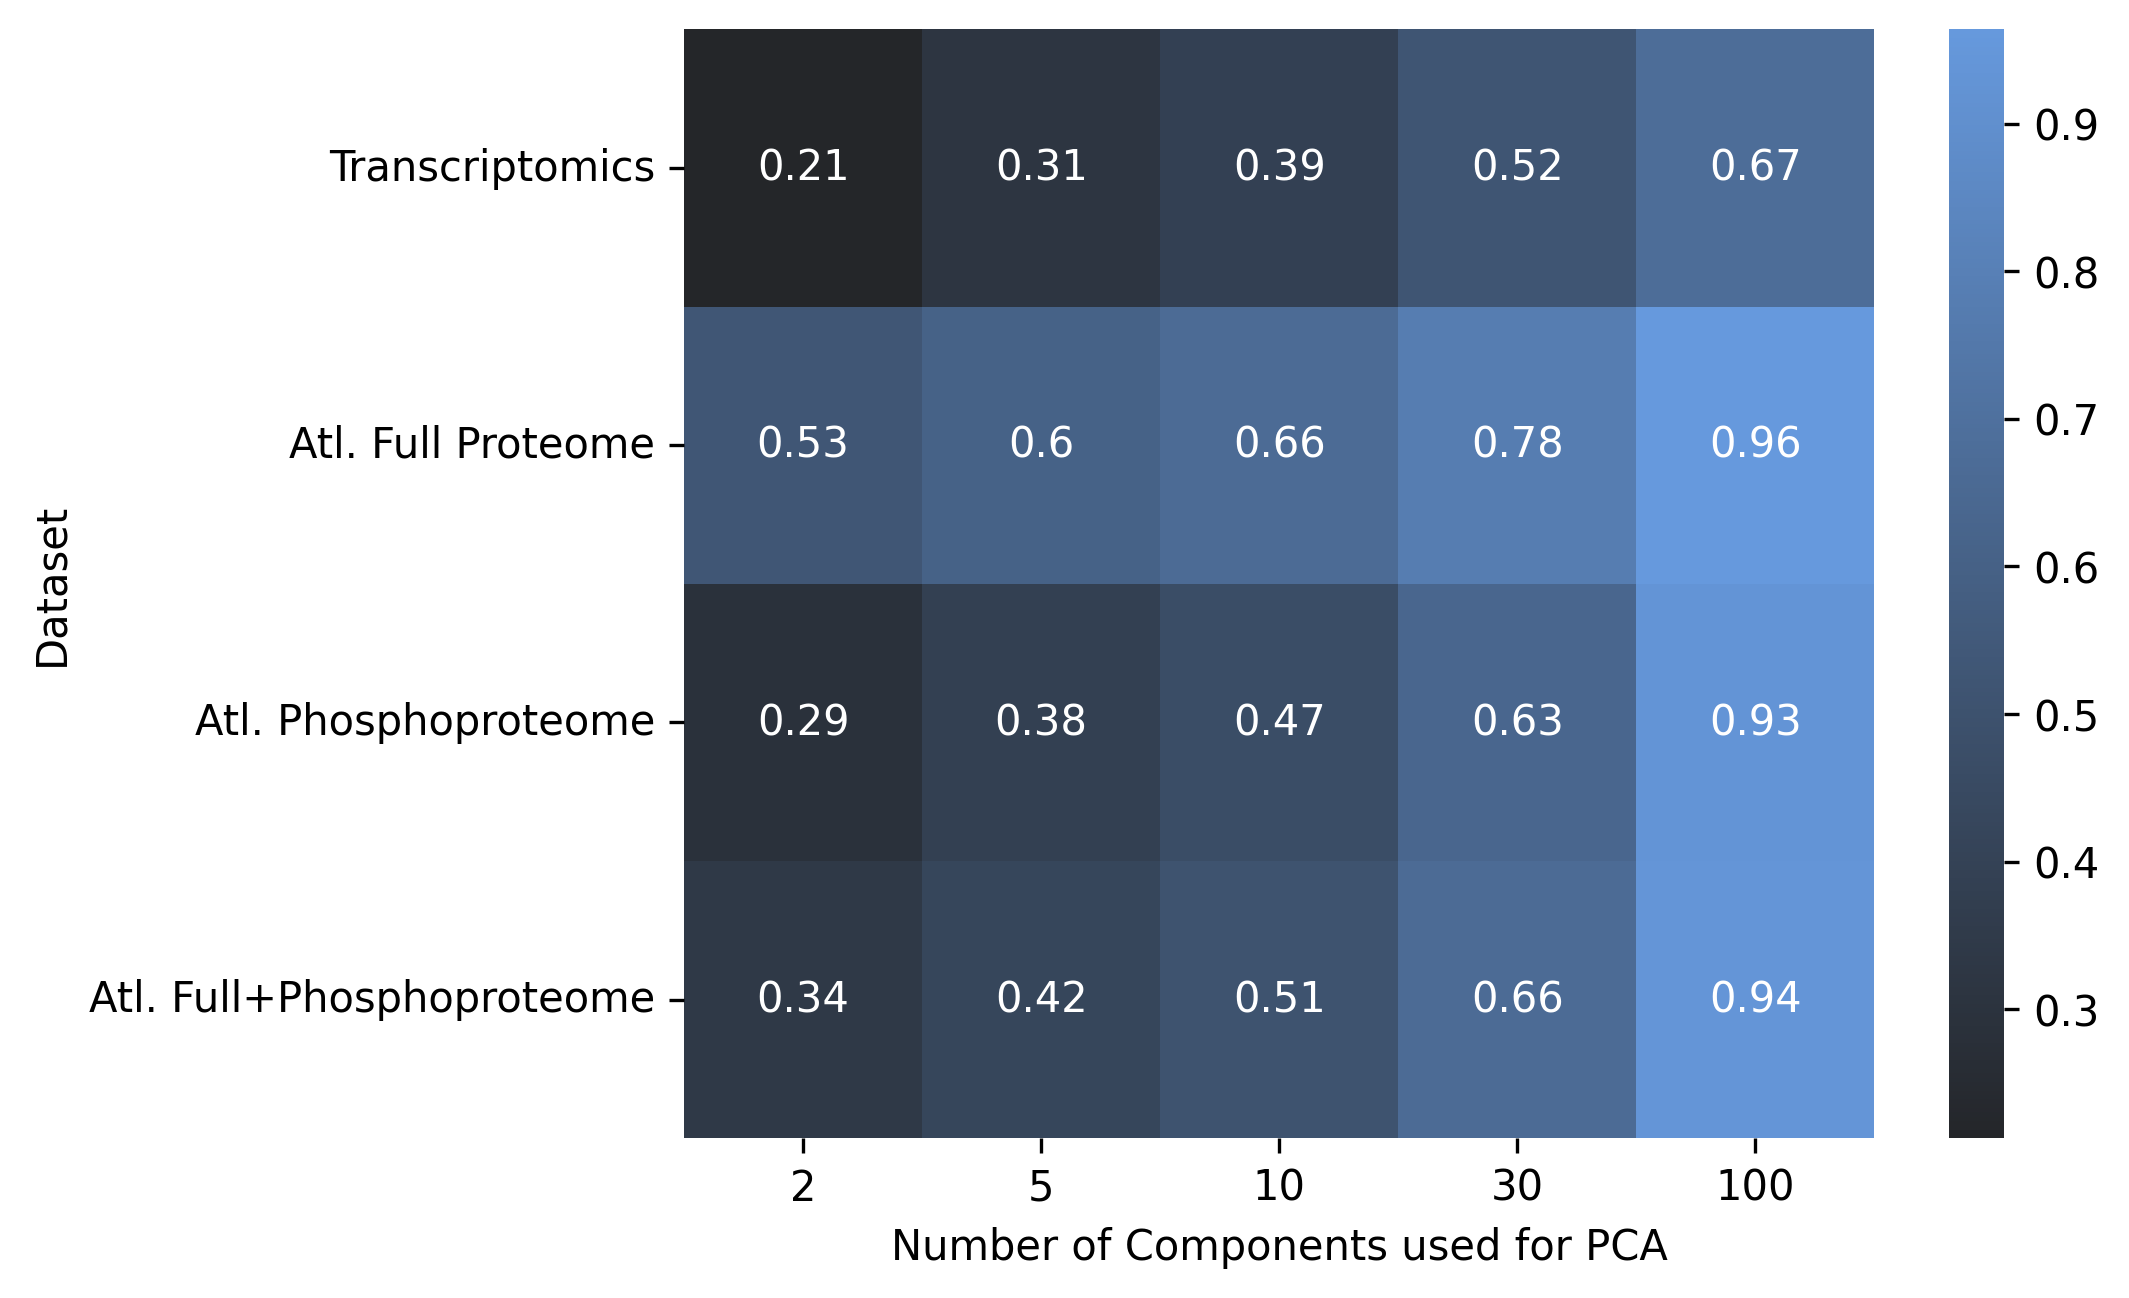

In [13]:
plt.rcParams['figure.dpi'] = 300
cmap = sns.dark_palette("#69d", reverse=False, as_cmap=True)
sns.heatmap(data=Dfe.T.iloc[:4,:], annot=True, cmap=cmap)
plt.ylabel('Dataset')
plt.xlabel('Number of Components used for PCA')